In [1]:
import numpy as np
from math import pi
from astropy.constants import h, c, k_B
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

import scipy.optimize as op
hbar = h/2/pi
hbar = hbar.value
h = h.value
k_B = k_B.value
from scipy.special import iv
I0 = lambda x: iv(0, x)

In [2]:
dBm = u.dB(u.mW)
T = np.array([0.179,  0.275, 0.321, 0.423, 0.504, 0.55, 0.561, 0.585, 0.636]) * u.K
f_r = np.array([273.8957, 273.893050, 273.826450,\
                273.2497, 272.1687, 271.1797, 270.9262, 270.3132, 268.6322]) * u.MHz
attenuation = 100 * dBm
P = 0 * dBm

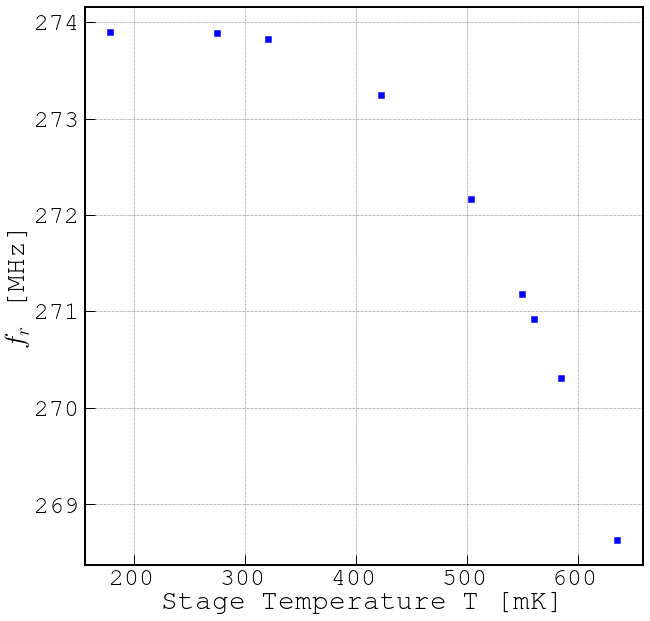

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(T.to('mK'), f_r, 'bs')
ax.set_ylabel(r'$f_r$ [MHz]')
ax.set_xlabel(r'Stage Temperature T [mK]')
ax.grid(which='both')
ax.xaxis.set_major_formatter(StrMethodFormatter("{x:3.0f}"))
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:3.0f}"))
plt.savefig('Resonant_Freq_vs_Temp.png');

In [4]:
x = (f_r - f_r[0])/f_r[0]
f0 = f_r[0].to('Hz').value

In [5]:
def S2(T, delta):
    eta = (hbar * 2*pi*f0/(2*k_B*T))
    return 1 +np.sqrt(2*delta/(pi*k_B*T))*np.exp(-eta)*I0(eta)

def freq_model(theta, T):
    alpha, delta = theta
    return -(alpha/2) * S2(T, delta)*np.sqrt(2*pi*k_B*T/delta)*np.exp(-delta/k_B/T)

In [6]:
def chisq(theta, x, y, yerr):
    return np.sum(((y - freq_model(theta, x))/yerr)**2)

In [25]:
ferr = np.ones_like(f_r)
guess = [0.4, 3.5 * k_B * 1.32]

In [26]:
result = op.minimize(chisq, guess, args=(T.value, x, ferr.value), method= 'Nelder-Mead')

In [27]:
alpha, delta = result['x']
Tc = delta/k_B/1.75
print (alpha)
print(Tc)

0.69846081146
1.48013080135


In [28]:
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
s = r"""$T_c$ = {1:1.3f} K
$\alpha$ = {0:1.3f}""".format(alpha, Tc)

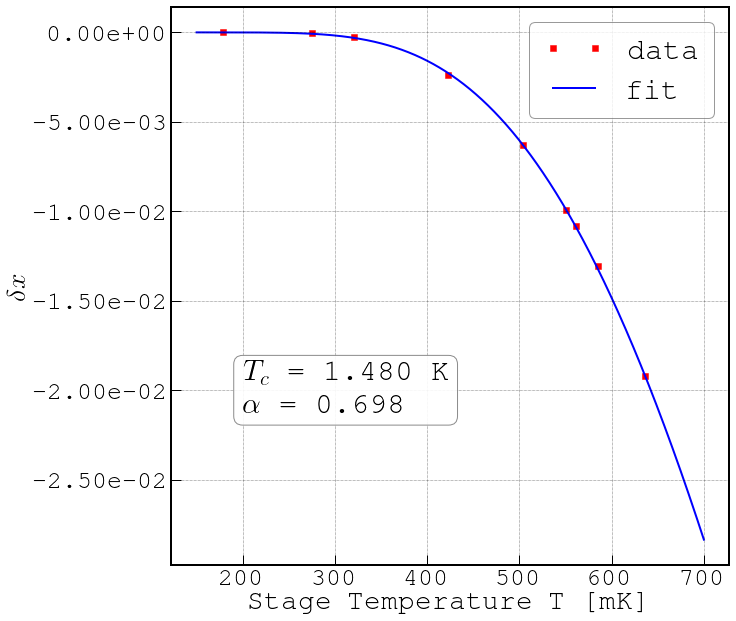

In [29]:
Tfit = np.r_[150:700:1000j]

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(T.to('mK'), x, 'rs', label='data')
ax.plot(Tfit, freq_model(result['x'], Tfit*1e-3), 'b', label='fit')
ax.set_ylabel(r'$\delta x$')
ax.set_xlabel(r'Stage Temperature T [mK]')
ax.grid(which='both')
ax.xaxis.set_major_formatter(StrMethodFormatter("{x:3.0f}"))
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:1.2e}"))
ax.text(200, -2e-2, s, fontsize=30, ha="left", va="center",
        bbox=bbox_props)
ax.legend(loc='best', fontsize=30, edgecolor="gray")
plt.savefig('Resonant_Freq_vs_Temp_Fitted.png');